In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
data=pd.read_csv("dataset.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.shape

(8950, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Checking if any cols have null values in it

In [5]:
data.isnull().sum()*100/len(data)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [6]:
# only credit_limit and minimum_payments contains null values in it.
# we we can handle them either by dropping the null values or by using central tendencies(mean,median,mode).

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


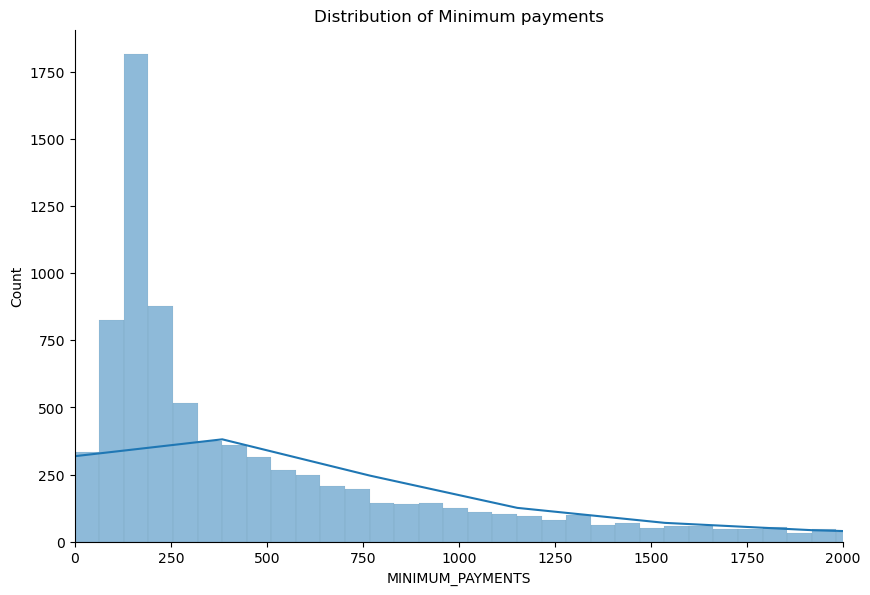

In [7]:
plot=sns.displot(x=data['MINIMUM_PAYMENTS'], data=data, kde=True)
plt.title('Distribution of Minimum payments')
plot.fig.set_figwidth(10)
plot.fig.set_figheight(6)
plot.set(xlim=(0, 2000))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


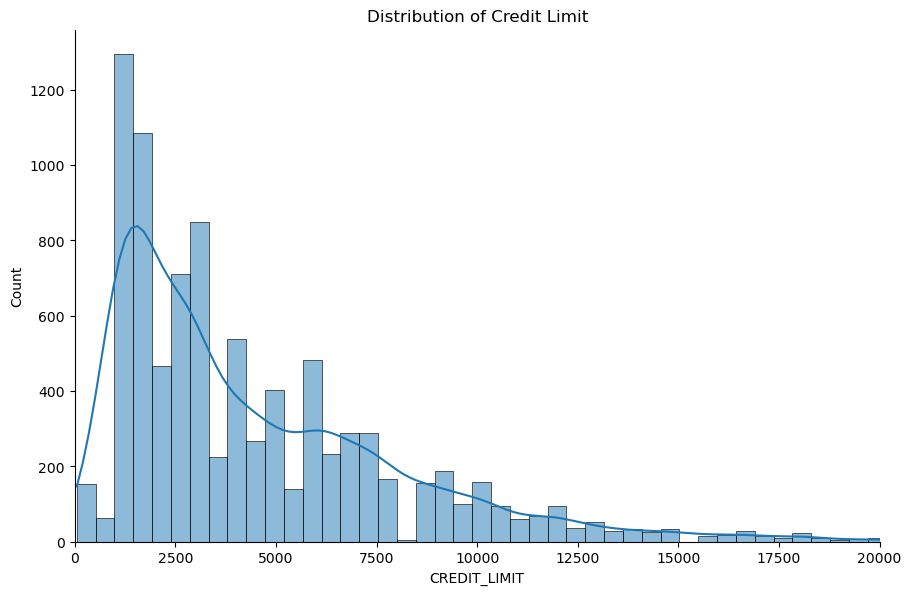

In [8]:
plot2=sns.displot(x=data['CREDIT_LIMIT'], data=data, kde=True)
plt.title('Distribution of Credit Limit')
plot2.fig.set_figwidth(10)
plot2.fig.set_figheight(6)
plot2.set(xlim=(0, 20000))

In [9]:
# here we can clearly see that both the columns distribution is Skewed (Skewed Right Distribution)-----> in this case we use median 

In [10]:
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median());

In [11]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median());

In [12]:
data.isnull().sum()*100/len(data)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [13]:
x=data[['BALANCE','PURCHASES','CREDIT_LIMIT']];

In [14]:
print(x)

          BALANCE  PURCHASES  CREDIT_LIMIT
0       40.900749      95.40        1000.0
1     3202.467416       0.00        7000.0
2     2495.148862     773.17        7500.0
3     1666.670542    1499.00        7500.0
4      817.714335      16.00        1200.0
...           ...        ...           ...
8945    28.493517     291.12        1000.0
8946    19.183215     300.00        1000.0
8947    23.398673     144.40        1000.0
8948    13.457564       0.00         500.0
8949   372.708075    1093.25        1200.0

[8950 rows x 3 columns]


Exploratory Data Analysis (EDA)

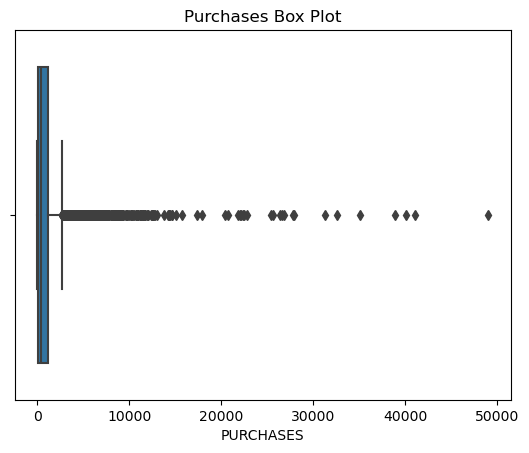

Outliers in 'PURCHASES':
6       7091.01
12      3217.99
21      6359.95
23      4248.35
30      3038.01
         ...   
8689    8053.95
8737    5633.83
8748    3950.00
8758    2918.08
8897    2806.78
Name: PURCHASES, Length: 808, dtype: float64


In [15]:
sns.boxplot(x='PURCHASES', data=data)
plt.title('Purchases Box Plot')
plt.show()


Q1 = np.percentile(data['PURCHASES'], 25)
Q3 = np.percentile(data['PURCHASES'], 75)

# Interquartile range (IQR)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data['PURCHASES'][(data['PURCHASES'] < lower_bound) | (data['PURCHASES'] > upper_bound)]


print("Outliers in 'PURCHASES':")
print(outliers)

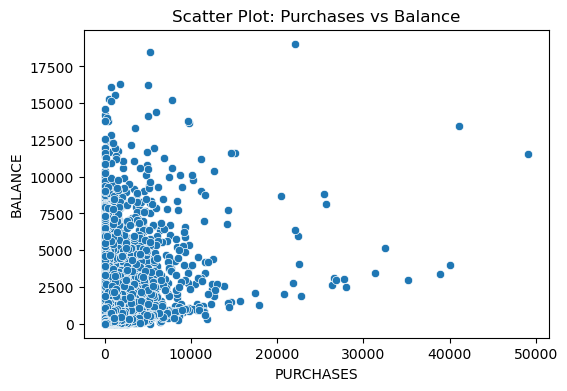

In [16]:
# Scatter plot for Purchases vs Balance
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='PURCHASES', y='BALANCE')
plt.title('Scatter Plot: Purchases vs Balance')
plt.show()

In [17]:
x.std()

BALANCE         2081.531879
PURCHASES       2136.634782
CREDIT_LIMIT    3638.646702
dtype: float64

#  Data Standardization

In [18]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [19]:
x_scaled.std()

0.9999999999999999

# Choosing the number of clusters in KMeans 

In [20]:
# WCSS -> WITHIN CLUSTER SUM OF SQUARES

wcss=[]

# for i in range(1,n+1)

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [21]:
print(wcss)

[26850.000000000007, 17026.069929035635, 13215.71087723266, 10237.76422244191, 8534.442942723625, 7126.054840284923, 6328.071201866602, 5663.823096830815, 5082.922724560437, 4689.171911404917]


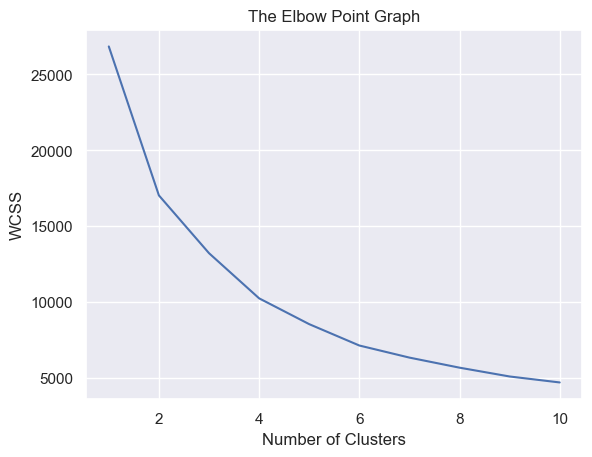

In [22]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# we can see that an elbow is forming at i=2
# so the optimal clusters will be 2

In [24]:
k=2
kmeans=KMeans(n_clusters=2,init='k-means++',n_init=10,random_state=1)
data['Cluster-kmeans']=kmeans.fit_predict(x_scaled)

data['Cluster-kmeans']

0       1
1       0
2       0
3       1
4       1
       ..
8945    1
8946    1
8947    1
8948    1
8949    1
Name: Cluster-kmeans, Length: 8950, dtype: int32

In [25]:
sil_score_ = silhouette_score(x_scaled, data['Cluster-kmeans'])
print(f'Silhouette Score for K-Means: {sil_score_}')

Silhouette Score for K-Means: 0.5488019185520879


Cluster 0 - Balance: 4372.12, Purchases: 2386.28, Credit Limit: 9710.79
Cluster 1 - Balance: 846.81, Purchases: 649.67, Credit Limit: 3160.88


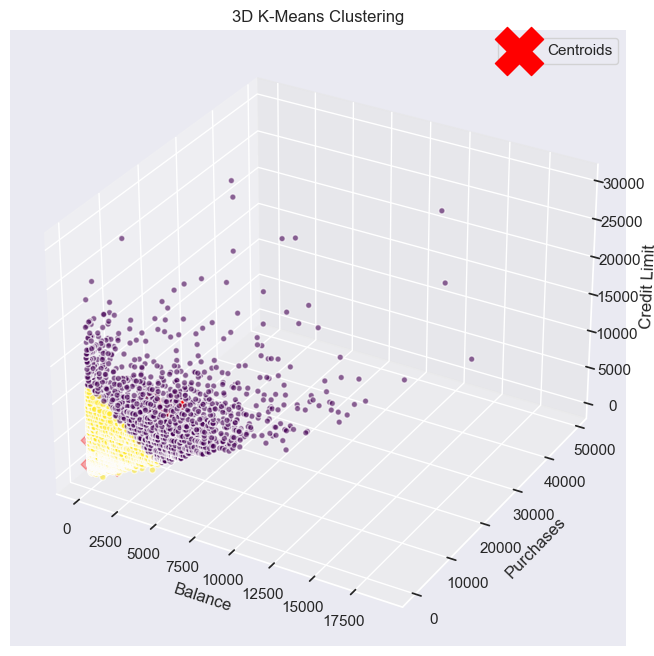

In [26]:
centroids = kmeans.cluster_centers_
centroids_scaled = scaler.inverse_transform(centroids)



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(data['BALANCE'], data['PURCHASES'], data['CREDIT_LIMIT'], 
                     c=data['Cluster-kmeans'], cmap='viridis', alpha=0.6, edgecolors='w')

ax.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], centroids_scaled[:, 2], 
           c='red', s=1200, marker='X', label='Centroids')


for i, centroid in enumerate(centroids_scaled):
     print(f"Cluster {i} - Balance: {centroid[0]:.2f}, Purchases: {centroid[1]:.2f}, Credit Limit: {centroid[2]:.2f}")


ax.set_xlabel('Balance')
ax.set_ylabel('Purchases')
ax.set_zlabel('Credit Limit')
ax.set_title('3D K-Means Clustering')
ax.legend()
plt.show()

 DBSCAN Algorithm

/var/folders/2x/4ljj6p310s7cwj3c90klchmw0000gn/T/ipykernel_8715/2591802189.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


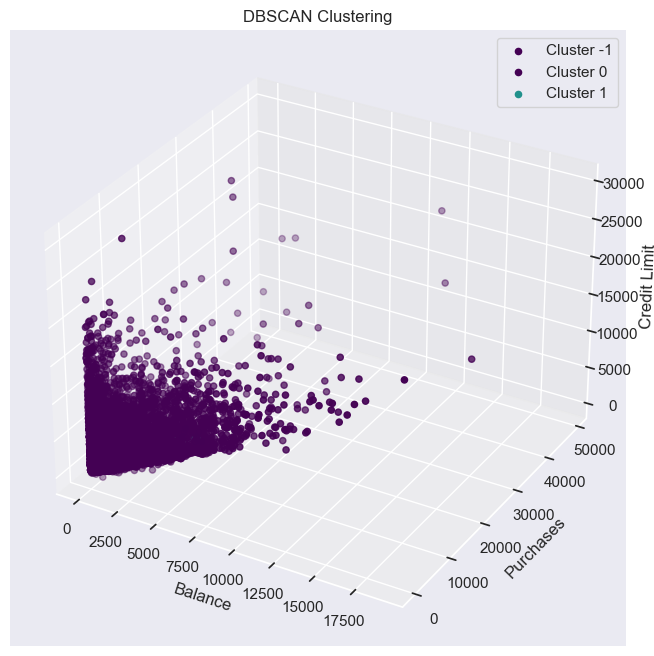

Silhouette Score of DBSCAN: 0.44612272365998995


In [27]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(x_scaled)


data['Cluster-DB'] = clusters


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


unique_clusters = np.unique(clusters)
colors = plt.cm.get_cmap('viridis', len(unique_clusters))



for cluster in unique_clusters:
    cluster_data = data[data['Cluster-DB'] == cluster]
    ax.scatter(cluster_data['BALANCE'], cluster_data['PURCHASES'], cluster_data['CREDIT_LIMIT'], 
               color=colors(cluster), label=f'Cluster {cluster}')


ax.set_xlabel('Balance')
ax.set_ylabel('Purchases')
ax.set_zlabel('Credit Limit')


plt.title('DBSCAN Clustering')
plt.legend()

plt.show()


if len(set(clusters)) > 1:  
    score = silhouette_score(x_scaled, clusters)
    print(f'Silhouette Score of DBSCAN: {score}')
else:
    print("Not enough clusters to calculate silhouette score.")

Clustering analysis:
we see that that k-means is performing better as compared to DBSCAN-----> Silhouette Score of K-means > Silhouette Score of DBSCAN
because of the 2 reasons that:1.)Some denser clusters may be merged with sparse regions, or sparse clusters may not be detected at all.
                              2.)DBSCAN may merge clusters that overlap slightly, or it may incorrectly define boundaries for clusters with                                  complex shapes.

The Silhouette Score is a metric used to evaluate the quality of clusters created by a clustering algorithm:
Its value range between +1 to -1;
+1 == good clustering
 0 == overlap between clusters
-1 == poor clustering

Cluster profiling 

In [28]:
# coordinates of centroids in k-means

for i, centroid in enumerate(centroids_scaled):
     print(f"Cluster {i} - Balance: {centroid[0]:.2f}, Purchases: {centroid[1]:.2f}, Credit Limit: {centroid[2]:.2f}")

Cluster 0 - Balance: 4372.12, Purchases: 2386.28, Credit Limit: 9710.79
Cluster 1 - Balance: 846.81, Purchases: 649.67, Credit Limit: 3160.88


Cluster 0:high income group:This segment represents high-income individuals who have significant spending power and are likely to use                                    their credit cards for a variety of purposes, from everyday expenses to luxury purchases. The high credit                                    limit reflects their strong financial standing, giving them more flexibility and higher spending capacity. 
                              High Credit Limit: 9,710.79 on average, which indicates that banks trust these customers to manage larger                                                      amounts of credit responsibly.
                              Moderate Purchases: 2,386.28 suggests these individuals make substantial monthly purchases, likely a mix of                                                     necessities and discretionary spending.
                              High Balance: 4,372.12 balance on their credit cards indicates they are carrying a substantial balance,                                                   possibly leveraging their credit for ongoing rewards, but they might still pay off portions of                                               their balance regularly.


Cluster 1:low income group:This segment consists of low-income individuals with lower credit limits, smaller purchases, and lower                                       average balances. The relatively low credit limit indicates that banks assign them less credit, likely due to                                their income or credit history, and they have lower spending power compared to Cluster 0.
                               Lower Credit Limit: 3,160.88, indicating that banks are more cautious in extending larger amounts of credit                                                    to this group.
                               Low Purchases: 649.67 in purchases reflects more restrained spending, likely focused on essentials.
                               Low Balance: 846.81 suggests they carry smaller balances and are more likely to pay off their debts                                             regularly, minimizing interest charges.

Marketing Recommendations

Cluster 0:High-Income Group:1)Premium Rewards and Loyalty Programs:Create top-tier status levels (e.g., Platinum or Black cards) with                                      enhanced perks like personal concierges, VIP lounge access, or increased cashback on certain categories                                      (e.g., travel, dining).
                             2)Personalized Offers:Collaborate with high-end brands (luxury hotels, airlines, designer brands) to provide                                   special discounts or promotions.
                             3)Wealth Management Services:High-income individuals might be interested in wealth management, investment                                      opportunities, or retirement planning services. Offer these products through personalized consultations.


Cluster 1:Low-Income Group:1)Cashback and Discount Offers:Provide cashback or discounts on everyday purchases such as groceries, fuel, and                              utilities, which are likely important for these customers.
                           2)Interest-Free Credit:Provide low-interest or zero-interest promotional periods on purchases or balance                              transfers to help customers reduce their debt.
                           3)Rewards for Responsible Spending:Implement programs that reward customers for maintaining low credit card                              balances, paying off balances in full, or avoiding late fees.